# Project Overview

I basically wanted to analyze any available dataset dealing with sports. One cool dataset that I found on Kaggle has box score data from every NBA game spanning 2012-2018. I will analyze some trends in the data that can maybe lead to predictions about game outcomes.

Here is the official dataset

https://www.kaggle.com/pablote/nba-enhanced-stats/data#

# Importing Basic Libraries

In [1]:
#Here are the libraries I tend to use in my analysis. I tend to import all of them at once for simplicity.
#If I need more, then I will import them as needed. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Glossary of Terms

Here is a glossary of the statistics that are outlined in the dataset

https://stats.nba.com/help/glossary/

# Exploratory Analysis

In [2]:
#Reading in of the dataset

box_score = pd.read_csv("2012-18_officialBoxScore.csv")

In [3]:
#First look at the dataset

box_score.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


In [4]:
#There are 44,284 rows and 119 columns worth of data

box_score.shape

(44284, 119)

In [5]:
#Here are the data types of each column
#Looks like most are numerical (integers and floats)

box_score.dtypes

gmDate         object
gmTime         object
seasTyp        object
offLNm         object
offFNm         object
teamAbbr       object
teamConf       object
teamDiv        object
teamLoc        object
teamRslt       object
teamMin         int64
teamDayOff      int64
teamPTS         int64
teamAST         int64
teamTO          int64
teamSTL         int64
teamBLK         int64
teamPF          int64
teamFGA         int64
teamFGM         int64
teamFG%       float64
team2PA         int64
team2PM         int64
team2P%       float64
team3PA         int64
team3PM         int64
team3P%       float64
teamFTA         int64
teamFTM         int64
teamFT%       float64
               ...   
opptPTS1        int64
opptPTS2        int64
opptPTS3        int64
opptPTS4        int64
opptPTS5        int64
opptPTS6        int64
opptPTS7        int64
opptPTS8        int64
opptTREB%     float64
opptASST%     float64
opptTS%       float64
opptEFG%      float64
opptOREB%     float64
opptDREB%     float64
opptTO%   

In [6]:
#Here we are checking to see if there are any missing variables 
#Looks like there aren't any null values in the dataset
#That makes cleaning much easier

box_score.isna().sum()

gmDate        0
gmTime        0
seasTyp       0
offLNm        0
offFNm        0
teamAbbr      0
teamConf      0
teamDiv       0
teamLoc       0
teamRslt      0
teamMin       0
teamDayOff    0
teamPTS       0
teamAST       0
teamTO        0
teamSTL       0
teamBLK       0
teamPF        0
teamFGA       0
teamFGM       0
teamFG%       0
team2PA       0
team2PM       0
team2P%       0
team3PA       0
team3PM       0
team3P%       0
teamFTA       0
teamFTM       0
teamFT%       0
             ..
opptPTS1      0
opptPTS2      0
opptPTS3      0
opptPTS4      0
opptPTS5      0
opptPTS6      0
opptPTS7      0
opptPTS8      0
opptTREB%     0
opptASST%     0
opptTS%       0
opptEFG%      0
opptOREB%     0
opptDREB%     0
opptTO%       0
opptSTL%      0
opptBLK%      0
opptBLKR      0
opptPPS       0
opptFIC       0
opptFIC40     0
opptOrtg      0
opptDrtg      0
opptEDiff     0
opptPlay%     0
opptAR        0
opptAST/TO    0
opptSTL/TO    0
poss          0
pace          0
Length: 119, dtype: int6

In [7]:
#Here are some standard statistics from the dataset
#Honestly, with so many columns worth of data it's hard to tell what I should be looking at here

box_score.describe()

,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
count,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000,44284.00000,44284.000000,...,44284.000000,44284.000000,44284.000000,4.428400e+04,44284.00000,44284.000000,44284.000000,44284.000000,44284.000000,44284.000000
mean,241.794576,1.939730,102.293086,22.388447,14.365617,7.751784,4.862795,20.129392,84.10033,38.210302,...,63.090755,107.059655,107.059655,-3.449704e-18,0.43498,17.017897,1.701269,58.048581,95.573082,94.873836
std,7.616808,1.070765,12.222973,5.076801,3.904487,2.924571,2.576983,4.336486,7.25922,5.024225,...,13.433833,11.306581,11.306581,1.440956e+01,0.05190,3.245338,0.709822,28.522690,5.816793,5.162873
min,226.000000,0.000000,58.000000,6.000000,2.000000,0.000000,0.000000,5.000000,60.00000,19.000000,...,15.729200,65.308000,65.308000,-6.240970e+01,0.25580,5.576200,0.321400,0.000000,77.561700,76.996500
25%,240.000000,1.000000,94.000000,19.000000,12.000000,6.000000,3.000000,17.000000,79.00000,35.000000,...,53.864475,99.430825,99.430825,-9.539800e+00,0.40000,14.792900,1.222200,38.461500,91.598400,91.331700
50%,240.000000,2.000000,102.000000,22.000000,14.000000,8.000000,5.000000,20.000000,84.00000,38.000000,...,62.552300,107.078300,107.078300,0.000000e+00,0.43480,16.991700,1.571400,53.333300,95.195600,94.764000
75%,240.000000,2.000000,110.000000,26.000000,17.000000,10.000000,6.000000,23.000000,89.00000,42.000000,...,71.770800,114.546925,114.546925,9.539800e+00,0.46990,19.149975,2.000000,71.428600,98.981400,98.266600
max,341.000000,11.000000,149.000000,47.000000,31.000000,21.000000,18.000000,42.000000,129.00000,58.000000,...,123.319300,155.624500,155.624500,6.240970e+01,0.63750,30.086000,10.000000,500.000000,131.144300,121.656400


In [8]:
#Here are some standard statistics from the dataset, but focused on the non-numerical columns

box_score.describe(include = 'object')

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt
count,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284,44284
unique,979,39,1,79,70,30,2,6,2,2,30,2,6,2,2
top,2016-11-25,20:00,Regular,Richardson,Scott,DEN,West,Northwest,Away,Win,DEN,West,Northwest,Away,Win
freq,90,6724,44284,1362,2140,1478,22148,7386,22142,22142,1478,22148,7386,22142,22142


#### Dropping Irrelevant Columns

There are two main ways of shrinking the dataset to make it more workable. I can either create a new dataset with the columns I want, or drop the columns from the dataset I have. In this instance I believe it's better to drop the columns because I don't know which columns I want for my analysis, but I do know which columns I *don't* wan't for my analysis. I am going to drop columns that I do not believe are vital to predicting game outcomes.

In [9]:
#Here I am going to drop columns that I don't find relevant to what I want to analyze
#I dropped "gmDate" because I don't think the date of the game matters for the outcome. This isn't time series analysis
#I dropped "gmTime" because it's not so much time that matters, but time difference, like if the Knicks play in Portland
#I dropped "seasTyp" because although there's a difference between playoffs and reg. season, this dataset only has the latter
#I dropped "teamAbbr" because I'm not looking for team impact, I'm looking for overall statistical impact
#I dropped "teamConf" because that would only be relevant when there's interconference games, which is a small part of the data
#I dropped "teamDiv" because divisions in basketball are not like baseball. They're basically irrelevant
#I dropped "opptAbbr" for the same reason I dropped "teamAbbr"
#I dropped "opptConf" for the same reason I dropped "teamConf"
#I dropped "opptDiv" for the same reason I dropped "teamDiv"
#I dropped "opptLoc" because that will be coded in "teamLoc" already
#I dropped "opptRslt" because that will be coded in "teamRslt" already
#I dropped "teamMin" because teams play the same amount of minutes. If this were an individual stat I'd keep it
#I dropped "opptMin" because teams play the same amount of minutes. If this were an individual stat I'd keep it
#I dropped "teamPTS" because we know whoever scores the most points wins. That's how wins are decided. 
#I dropped "opptPTS" for the same reason I dropped "teamPTS"
#I dropped "teamFIC" because Floor Impact Counter makes sense for individual players, not entire teams
#I dropped "opptFIC" for the same reason I dropped "teamFIC"
#I dropped "teamFIC40" and "opptFIC40" for the same reason I dropped "teamFIC"
#I dropped "teamORB/opptORB" and "teamDRB/opptDRB" because I'm going to focus on total rebounds
#I dropped "teamFT%" and 'team FTM' because I care more about free throw attempts (are teams getting to the line more)
#I dropped "team2PM" and "team 2P%" because like with free throws I care more about attempts (in a negative sense in this case)
#I dropped the opponent counterparts to 2PM and 2P% as well
#I dropped "team3PM" because that will be encoded with three point percentage
#I dropped "teamPTS1-8" and the oppt counterpart because I don't care how many points are scored per quarter for a team 
#I dropped "teamPPS" because I don't know what it is
#I dropped "teamPlay%" because I don't know what it is
#I dropped "teamAR" because I don't know what it is
#I dropped "teamOREB%/opptOREB%/teamDREB%/opptDREB%" because I am focused on overall rebounds
#I dropped "teamBLK%/teamSTL%/teamASST%/teamTO%" and their oppt counterparts because I'm focused on whole values 
#I dropped "teamAST/TO, teamSTL/TO, teamBLKR" and their oppt counterparts since I'm focused on whole numbers
#I dropped "poss" and "pace" because they aren't specific to each team



box_score = box_score.drop(['gmDate','gmTime','seasTyp','teamAbbr','teamConf','teamDiv','opptAbbr','opptConf',
                            'opptDiv','opptLoc','opptRslt','teamMin', 'opptMin', 'teamPTS', 'opptPTS', 'teamFIC', 
                            'opptFIC', 'opptPlay%', 'poss', 'pace', 'teamEDiff', 'opptEDiff', 'opptEFG%', 'opptPPS',
                            'teamFIC40', 'opptFIC40', 'teamORB', 'teamDRB', 'teamFT%', 'opptFT%', 'teamFTM', 'opptFTM',
                            'team2PM','team2P%', 'team3PM', 'oppt3PM', 'teamPTS1', 'teamPTS2', 'teamPTS3', 'teamPTS4', 
                            'teamPTS4','teamPTS5', 'teamPTS6', 'teamPTS7', 'teamPTS8', 'teamPPS', 'opptAR','teamPlay%', 
                            'teamAR', 'teamOREB%', 'opptOREB%', 'teamDREB%', 'opptDREB%', 'opptORB', 'opptDRB', 'teamBLK%', 
                            'opptBLK%', 'opptAR', 'teamSTL%', 'opptSTL%', 'teamASST%', 'opptASST%', 'teamTO%', 'opptTO%', 
                            'teamAST/TO', 'opptAST/TO', 'teamSTL/TO', 'opptSTL/TO', 'teamBLKR', 'opptBLKR', 'teamTREB%', 
                            'opptTREB%', 'opptPTS1', 'opptPTS2', 'opptPTS3', 'opptPTS4', 'opptPTS4','opptPTS5', 'opptPTS6', 
                            'opptPTS7', 'opptPTS8', 'oppt2PM','oppt2P%', 'teamTS%', 'opptTS%', 'teamEFG%'], axis = 'columns')

In [10]:
#Dataset post dropping columns

box_score.head()

,offLNm,offFNm,teamLoc,teamRslt,teamDayOff,teamAST,teamTO,teamSTL,teamBLK,teamPF,...,opptFGA,opptFGM,opptFG%,oppt2PA,oppt3PA,oppt3P%,opptFTA,opptTRB,opptOrtg,opptDrtg
0,Brothers,Tony,Away,Loss,0,26,13,11,10,19,...,79,36,0.4557,59,20,0.35,22,54,105.6882,94.4447
1,Smith,Michael,Away,Loss,0,26,13,11,10,19,...,79,36,0.4557,59,20,0.35,22,54,105.6882,94.4447
2,Workman,Haywoode,Away,Loss,0,26,13,11,10,19,...,79,36,0.4557,59,20,0.35,22,54,105.6882,94.4447
3,Brothers,Tony,Home,Win,0,22,21,7,5,21,...,90,32,0.3556,58,32,0.25,20,39,94.4447,105.6882
4,Smith,Michael,Home,Win,0,22,21,7,5,21,...,90,32,0.3556,58,32,0.25,20,39,94.4447,105.6882


In [11]:
#There are still 44,284 rows, but now there are 36 columns worth of data

box_score.shape

(44284, 36)

#### Column Transformation

Many of the columns in this dataset are mirrors of other columns. For example you have team assists and opponent assists. While I believe assists matter, I don't think individual team assists matter. I don't think you can say "oh if we get 50 assists we are going to win." I think a better metric would be assist DIFFERENCE. The difference in assists between teams could have a significant impact on the outcome of the game. Below I am going to do several column transformations that take into account these differences.

In [12]:
#Net_Day_Off: teamDayOff - opptDayOff, does the difference in days off before a game have an effect on the outcome?

box_score["Net_Day_Off"] = box_score["teamDayOff"] - box_score["opptDayOff"]

#Net_AST: teamAST - opptAST, does the magnitude of difference in assists have an effect on the outcome?

box_score["Net_AST"] = box_score["teamAST"] - box_score["opptAST"]

#Net_TO: teamTO - opptTO, does the magnitude of difference in turnovers have an effect on the outcome?

box_score["Net_TO"] = box_score["teamTO"] - box_score["opptTO"]

#Net_STL: teamSTL - opptSTL, does the magnitude of difference in steals have an effect on the outcome?

box_score["Net_STL"] = box_score["teamSTL"] - box_score["opptSTL"]

#Net_BLK: teamBLK - opptBLK, does the magnitude of difference in blocks have an effect on the outcome?

box_score["Net_BLK"] = box_score["teamBLK"] - box_score["opptBLK"]

#Net_Fouls: teamPF - opptPF, does the magnitude of difference in team fouls have an effect on the outcome?

box_score["Net_Fouls"] = box_score["teamPF"] - box_score["opptPF"]

#Net_FGA: teamFGA - opptFGA, does the magnitude of difference in field goal attempts have an effect on the outcome?

box_score["Net_FGA"] = box_score["teamFGA"] - box_score["opptFGA"]

#Net_FG%: teamFG% - opptFG%, does the magnitude of difference in field goal percentage have an effect on the outcome?

box_score["Net_FG%"] = box_score["teamFG%"] - box_score["opptFG%"]

#Net_2PA: team2PA - oppt2PA, does the magnitude of difference in two point attempts have an effect on the outcome?

box_score["Net_2PA"] = box_score["team2PA"] - box_score["oppt2PA"]

#Net_3PA: team3PA - oppt3PA, does the magnitude of difference in three point attempts have an effect on the outcome?

box_score["Net_3PA"] = box_score["team3PA"] - box_score["oppt3PA"]

#Net_3P%: team3P% - oppt3P%, does the magnitude of difference in three point percentage have an effect on the outcome?

box_score["Net_3P%"] = box_score["team3P%"] - box_score["oppt3P%"]

#Net_FTA: teamFTA - opptFTA, does the magnitude of difference in free throw attempts have an effect on the outcome?

box_score["Net_FTA"] = box_score["teamFTA"] - box_score["opptFTA"]

#Net_TRB: teamTRB - opptTRB, does the magnitude of difference in team rebounds have an effect on the outcome?

box_score["Net_TRB"] = box_score["teamTRB"] - box_score["opptTRB"]

#Net_OR: teamOrtg - opptOrtg, does the magnitude of difference in offensive rating have an effect on the outcome?

box_score["Net_OR"] = box_score["teamOrtg"] - box_score["opptOrtg"]

#Net_DR: teamDrtg - opptDrtg, does the magnitude of difference in defensive rating have an effect on the outcome?

box_score["Net_DR"] = box_score["teamDrtg"] - box_score["opptDrtg"]

#### More Column Dropping

In [13]:
#I dropped 'teamDayoff' and 'opptDayoff' since I used their difference as a separate column
#I dropped 'teamAST' and 'opptAST' since I used their difference as a separate column
#I dropped 'teamTO' and 'opptTO' since I used their difference as a separate column
#I dropped 'teamSTL' and 'opptSTL' since I used their difference as a separate column
#I dropped 'teamBLK' and 'opptBLK' since I used their difference as a separate column
#I dropped 'teamPF' and 'opptPF' since I used their difference as a separate column
#I dropped 'teamFGA' and 'opptFGA' since I used their difference as a separate column
#I dropped 'teamFG%' and 'opptFG%' since I used their difference as a separate column
#I dropped 'team3PA' and 'oppt3PA' since I used their difference as a separate column
#I dropped 'teamFTA' and 'opptFTA' since I used their difference as a separate column
#I dropped 'teamTRB' and 'opptTRB' since I used their difference as a separate column
#I dropped 'team2PA' and 'oppt2PA' since I used their difference as a separate column
#I dropped 'teamFGM' and 'opptFGM' because they are better represented by field goal percentage
#I dropped 'team3P%' and 'oppt3P%' since I used their difference as a separate column
#I dropped "teamOrtg/teamDrtg" and the oppt counterparts since I used their difference as a separate column
#I dropeed "offLNm"/"offFNm" because it's too difficult to assess referee impact for this. I will examine this in other projects


box_score = box_score.drop(['teamDayOff','opptDayOff','teamAST','opptAST','teamTO','opptTO','teamSTL','opptSTL',
                          'teamBLK','opptBLK','teamPF','opptPF', 'teamFGA', 'opptFGA', 'teamFG%', 'opptFG%',
                           'team3PA', 'oppt3PA', 'teamFTA', 'opptFTA', 'teamTRB', 'opptTRB', 'teamFGM', 'team2PA', 
                            'oppt2PA', 'opptFGM', 'team3P%', 'oppt3P%', 'teamOrtg', 'opptOrtg',
                           'teamDrtg', 'opptDrtg', 'offLNm', 'offFNm'], axis = 'columns')

In [14]:
#What does the dataset look like after all of the dropping and transforming?

box_score.head()

,teamLoc,teamRslt,Net_Day_Off,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FGA,Net_FG%,Net_2PA,Net_3PA,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR
0,Away,Loss,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435
1,Away,Loss,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435
2,Away,Loss,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435
3,Home,Win,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435
4,Home,Win,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435


In [15]:
#After further transformation there are 44,284 rows and 17 columns worth of data

box_score.shape

(44284, 17)

#### Dummy Variable Transformation

In order to create a predictive model, I need to convert the wins and losses into 0s and 1s. As you can tell, my idea will be to do a logistic regression.

In [16]:
#Here I am simply tallying up the wins and losses. As stated before, these are mirror images of each other.

box_score['teamRslt'].value_counts()

Win     22142
Loss    22142
Name: teamRslt, dtype: int64

In [17]:
#Here I am officially converting the categorical variables into dummy variables

box_score = pd.get_dummies(box_score, columns=['teamRslt'], drop_first=True)

In [18]:
#Wins = 1 And Losses = 0

box_score.head()

,teamLoc,Net_Day_Off,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FGA,Net_FG%,Net_2PA,Net_3PA,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR,teamRslt_Win
0,Away,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0
1,Away,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0
2,Away,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0
3,Home,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435,1
4,Home,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435,1


I am also going to convert Home and Away to dummy variables to check if the location has an effect on the outcome

In [19]:
#Here I am officially converting the categorical variables into dummy variables

box_score = pd.get_dummies(box_score, columns=['teamLoc'], drop_first=True)

In [20]:
#Checking to see if it was successful
#Home = 1, Away = 0

box_score.head()

,Net_Day_Off,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FGA,Net_FG%,Net_2PA,Net_3PA,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR,teamRslt_Win,teamLoc_Home
0,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0,0
1,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0,0
2,0,4,-8,4,5,-2,11,-0.1001,-1,12,-0.1,-2,-15,-11.2435,11.2435,0,0
3,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435,1,1
4,0,-4,8,-4,-5,2,-11,0.1001,1,-12,0.1,2,15,11.2435,-11.2435,1,1


In [22]:
#There are still 44,284 rows of data and 17 columns worth of data

box_score.shape

(44284, 17)

In [23]:
#Here are the official columns for the cleaned dataset

box_score.columns

Index(['Net_Day_Off', 'Net_AST', 'Net_TO', 'Net_STL', 'Net_BLK', 'Net_Fouls',
       'Net_FGA', 'Net_FG%', 'Net_2PA', 'Net_3PA', 'Net_3P%', 'Net_FTA',
       'Net_TRB', 'Net_OR', 'Net_DR', 'teamRslt_Win', 'teamLoc_Home'],
      dtype='object')

# Correlation and Data Visualization

Now that I have cleaned the dataset on a first run, I want to see which variables correlate well with wins and losses. I will narrow the variables down to those I find to be the most significant, and then I will see what their predictive power can be.

#### Determining the explanatory variables

In [24]:
#Here is how each of the independent variables in my dataset correlate to wins and losses

box_score.corr().loc[:, 'teamRslt_Win'].sort_values(ascending=False)

teamRslt_Win    1.000000
Net_OR          0.809808
Net_FG%         0.648345
Net_AST         0.474187
Net_3P%         0.437778
Net_TRB         0.362623
Net_BLK         0.250667
Net_STL         0.211674
Net_FTA         0.186736
teamLoc_Home    0.172703
Net_Day_Off     0.058785
Net_3PA         0.040363
Net_FGA        -0.083097
Net_2PA        -0.095310
Net_TO         -0.179029
Net_Fouls      -0.191126
Net_DR         -0.809808
Name: teamRslt_Win, dtype: float64

In [25]:
#My cutoff rate is going to be variables less than .1 correlated (positive or negative) with wins

#Here I am adjusting the dataset to only those variables with .1 or greater correlation

box_score = box_score.drop(['Net_Day_Off','Net_3PA','Net_FGA', 'Net_2PA'], axis = 'columns')

In [26]:
box_score.corr().loc[:, 'teamRslt_Win'].sort_values(ascending=False)

teamRslt_Win    1.000000
Net_OR          0.809808
Net_FG%         0.648345
Net_AST         0.474187
Net_3P%         0.437778
Net_TRB         0.362623
Net_BLK         0.250667
Net_STL         0.211674
Net_FTA         0.186736
teamLoc_Home    0.172703
Net_TO         -0.179029
Net_Fouls      -0.191126
Net_DR         -0.809808
Name: teamRslt_Win, dtype: float64

#### Plotting distribution of the explanatory variables

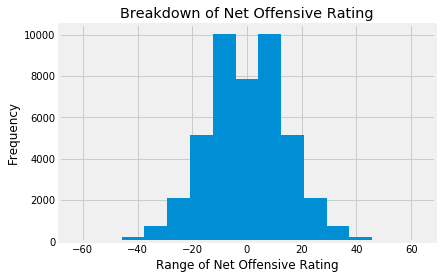

In [27]:
#Here is a historgram for Net_OR 

box_score.loc[:,"Net_OR"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Offensive Rating")
plt.title("Breakdown of Net Offensive Rating");

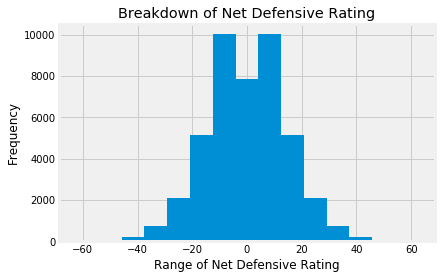

In [28]:
#Here is a historgram for Net_DR 

box_score.loc[:,"Net_DR"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Defensive Rating")
plt.title("Breakdown of Net Defensive Rating");

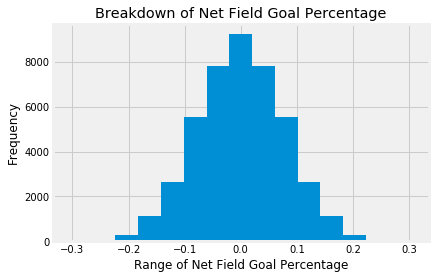

In [29]:
#Here is a historgram for Net_FG%
#Looks like a perfectly normal distribution

box_score.loc[:,"Net_FG%"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Field Goal Percentage")
plt.title("Breakdown of Net Field Goal Percentage");

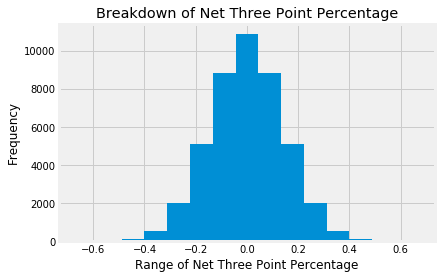

In [30]:
#Here is a historgram for Net_3P%
#Looks like a perfectly normal distribution

box_score.loc[:,"Net_3P%"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Three Point Percentage")
plt.title("Breakdown of Net Three Point Percentage");

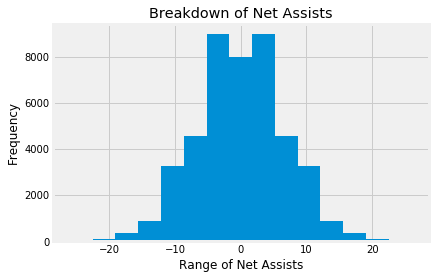

In [31]:
#Here is a historgram for Net_AST

box_score.loc[:,"Net_AST"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Assists")
plt.title("Breakdown of Net Assists");

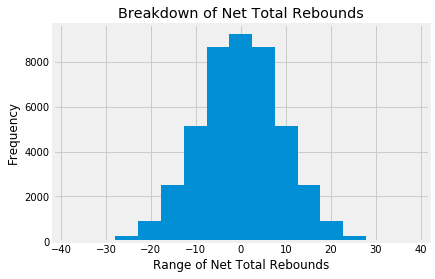

In [32]:
#Here is a historgram for Net_TRB
#Looks like a perfectly normal distribution

box_score.loc[:,"Net_TRB"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Total Rebounds")
plt.title("Breakdown of Net Total Rebounds");

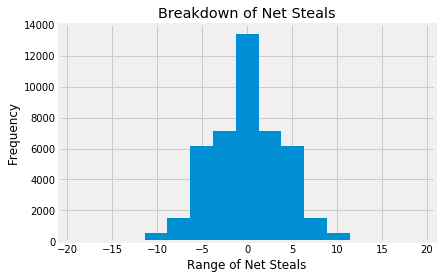

In [33]:
#Here is a historgram for Net_STL
#Looks like a perfectly normal distribution

box_score.loc[:,"Net_STL"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Steals")
plt.title("Breakdown of Net Steals");

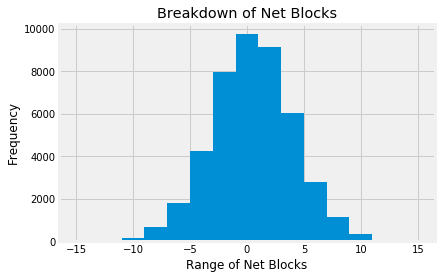

In [34]:
#Here is a historgram for Net_BLK

box_score.loc[:,"Net_BLK"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Blocks")
plt.title("Breakdown of Net Blocks");

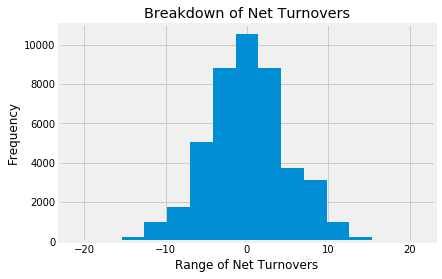

In [35]:
#Here is a historgram for Net_TO
#Looks like a perfectly normal distribution

box_score.loc[:,"Net_TO"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Turnovers")
plt.title("Breakdown of Net Turnovers");

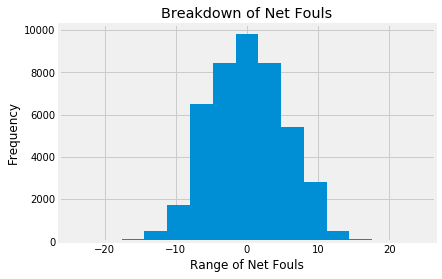

In [36]:
#Here is a historgram for Net_Fouls

box_score.loc[:,"Net_Fouls"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Fouls")
plt.title("Breakdown of Net Fouls");

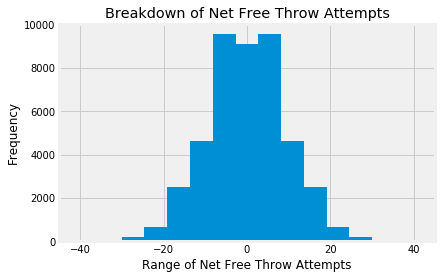

In [37]:
#Here is a historgram for Net_FTA

box_score.loc[:,"Net_FTA"].plot(kind='hist', bins=15)
plt.xlabel("Range of Net Free Throw Attempts")
plt.title("Breakdown of Net Free Throw Attempts");

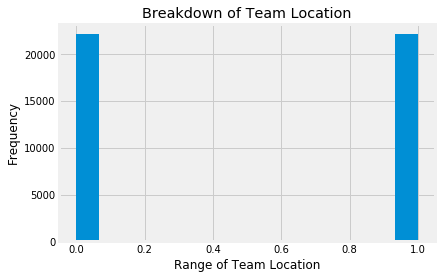

In [38]:
#Here is a historgram for teamLoc_Home

box_score.loc[:,"teamLoc_Home"].plot(kind='hist', bins=15)
plt.xlabel("Range of Team Location")
plt.title("Breakdown of Team Location");

#### Scatter Plots for Each Variable

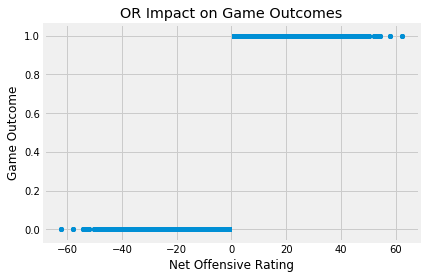

In [39]:
#Scatter Plot for Net_OR

ax = box_score.plot(kind='scatter', x='Net_OR', y='teamRslt_Win')

plt.ylabel("Game Outcome")

plt.xlabel("Net Offensive Rating")

plt.title("OR Impact on Game Outcomes");

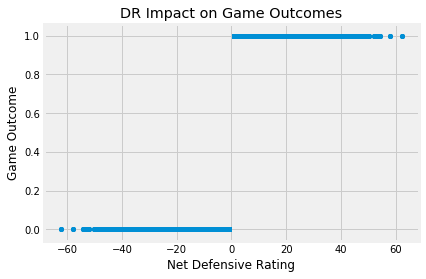

In [40]:
#Scatter Plot for Net_DR

ax = box_score.plot(kind='scatter', x='Net_OR', y='teamRslt_Win')

plt.ylabel("Game Outcome")

plt.xlabel("Net Defensive Rating")

plt.title("DR Impact on Game Outcomes");

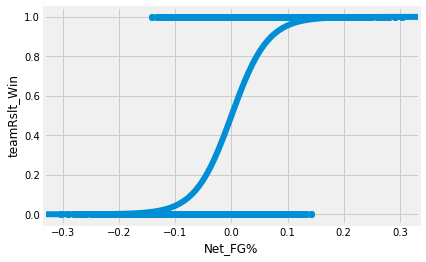

In [41]:
#Scatter Plot for Net_FG%
#Clear positive correlation between Net_FG% and Wins

sns.regplot(x='Net_FG%', y='teamRslt_Win', data=box_score, logistic=True)

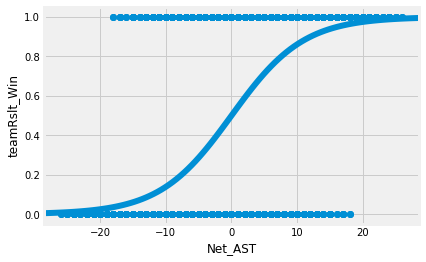

In [42]:
#Scatter Plot for Net_AST
#Clear positive correlation between Net_AST and Wins

sns.regplot(x='Net_AST', y='teamRslt_Win', data=box_score, logistic=True)

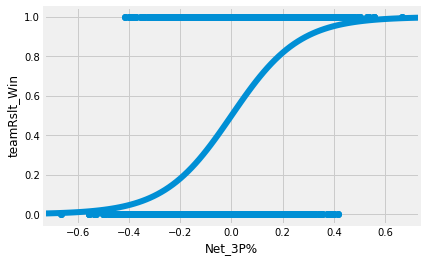

In [43]:
#Scatter Plot for Net_3P%
#Clear positive correlation between Net_3P% and Wins

sns.regplot(x='Net_3P%', y='teamRslt_Win', data=box_score, logistic=True)

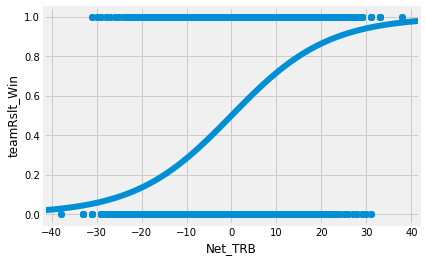

In [44]:
#Scatter Plot for Net_TRB
#Clear positive correlation between Net_TRB and Wins

sns.regplot(x='Net_TRB', y='teamRslt_Win', data=box_score, logistic=True)

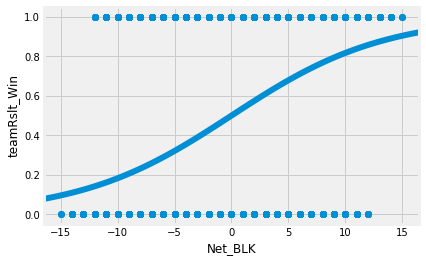

In [45]:
#Scatter Plot for Net_BLK
#Slight positive correlation between Net_BLK and Wins

sns.regplot(x='Net_BLK', y='teamRslt_Win', data=box_score, logistic=True)

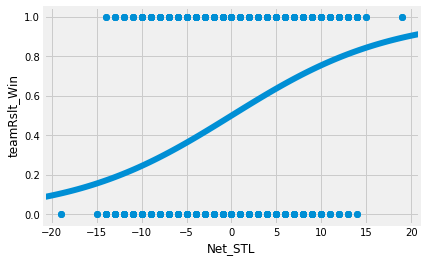

In [46]:
#Scatter Plot for Net_STL
#Slight positive correlation between Net_STL and Wins

sns.regplot(x='Net_STL', y='teamRslt_Win', data=box_score, logistic=True)

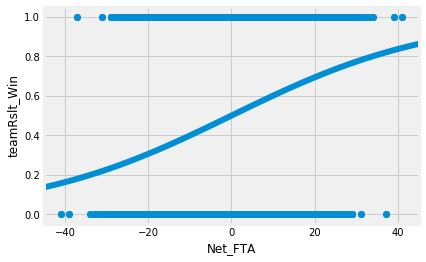

In [47]:
#Scatter Plot for Net_FTA
#Slight positive correlation between Net_FTA and Wins

sns.regplot(x='Net_FTA', y='teamRslt_Win', data=box_score, logistic=True)

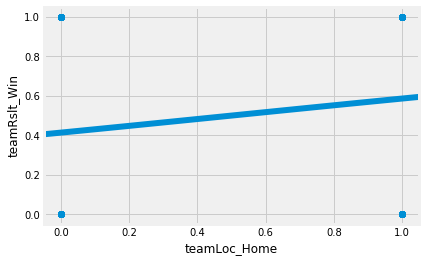

In [48]:
#Scatter Plot for teamLoc_Home
#Very small positive correlation between home games and wins

sns.regplot(x='teamLoc_Home', y='teamRslt_Win', data=box_score, logistic=True)

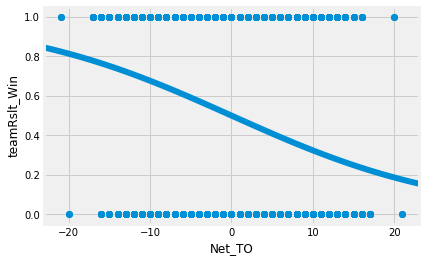

In [49]:
#Scatter Plot for Net_TO
#Slight negative correlation between Net_TO and wins

sns.regplot(x='Net_TO', y='teamRslt_Win', data=box_score, logistic=True)

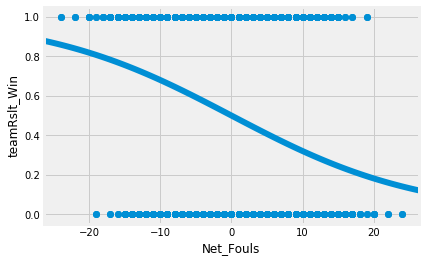

In [50]:
#Scatter Plot for Net_Fouls
#Slight negative correlation between Net_Fouls and wins

sns.regplot(x='Net_Fouls', y='teamRslt_Win', data=box_score, logistic=True)

# Logistic Regression Set Up

Now that I have found the variables I believe are the most impactful on game outcomes, I am going to build a logistic regression model to test them out.

In [51]:
#Separating X and y values

X = box_score.drop('teamRslt_Win', axis='columns')
y = box_score.loc[:, 'teamRslt_Win']

In [52]:
#Here I am importing train-test split so I can create a training set to train the model and a test set to test it

from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .25 means 25% of the data will be used for the test set and 75% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

#Here I am fitting the model on the training set
classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
#Here I am creating the predicted values from the test set in order to evalute the model later using a confusion matrix

y_pred = classifier.predict(X_test)

In [55]:
#Just verifying my results. 1-0-1-0 is how the logistic regression model should be

print(y_pred)

[1 0 1 ... 0 1 0]


In [56]:
#Well, according to the scoring of the model, mine has perfect predictive power.
#I highly doubt I found the perfect model

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

1.0
1.0


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

In [58]:
#We have 11,071 correct predictions and 0 incorrect predictions
#Once again I do not believe I found the perfect model

print(cm)

[[5577    0]
 [   0 5494]]


In [59]:
#Accuracy of our model, 100% accuracy
(5577+5494)/11071

1.0

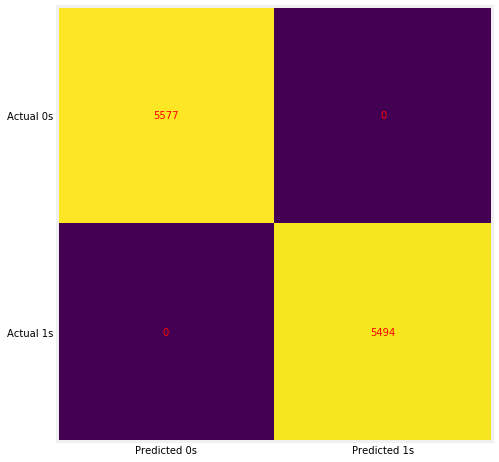

In [60]:
#Here is just a more visual way of seeing the confusion matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Checking for collinearity

Perhaps some of my independent variables correlate strongly with each other. If they do, then I need to adjust the model

In [61]:
box_score.head()

,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FG%,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR,teamRslt_Win,teamLoc_Home
0,4,-8,4,5,-2,-0.1001,-0.1,-2,-15,-11.2435,11.2435,0,0
1,4,-8,4,5,-2,-0.1001,-0.1,-2,-15,-11.2435,11.2435,0,0
2,4,-8,4,5,-2,-0.1001,-0.1,-2,-15,-11.2435,11.2435,0,0
3,-4,8,-4,-5,2,0.1001,0.1,2,15,11.2435,-11.2435,1,1
4,-4,8,-4,-5,2,0.1001,0.1,2,15,11.2435,-11.2435,1,1


In [62]:
box_score.dtypes

Net_AST           int64
Net_TO            int64
Net_STL           int64
Net_BLK           int64
Net_Fouls         int64
Net_FG%         float64
Net_3P%         float64
Net_FTA           int64
Net_TRB           int64
Net_OR          float64
Net_DR          float64
teamRslt_Win      uint8
teamLoc_Home      uint8
dtype: object

In [63]:
#I have to convert some variables to integers because apparently the heatmap won't accept floats

box_score2 = box_score.astype({'Net_FG%': int})

In [64]:
box_score2 = box_score2.astype({'Net_3P%': int})

In [65]:
box_score2 = box_score2.astype({'Net_OR': int})

In [66]:
box_score2 = box_score2.astype({'Net_DR': int})

In [67]:
box_score2.dtypes

Net_AST         int64
Net_TO          int64
Net_STL         int64
Net_BLK         int64
Net_Fouls       int64
Net_FG%         int32
Net_3P%         int32
Net_FTA         int64
Net_TRB         int64
Net_OR          int32
Net_DR          int32
teamRslt_Win    uint8
teamLoc_Home    uint8
dtype: object

In [68]:
box_score2.head()

,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FG%,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR,teamRslt_Win,teamLoc_Home
0,4,-8,4,5,-2,0,0,-2,-15,-11,11,0,0
1,4,-8,4,5,-2,0,0,-2,-15,-11,11,0,0
2,4,-8,4,5,-2,0,0,-2,-15,-11,11,0,0
3,-4,8,-4,-5,2,0,0,2,15,11,-11,1,1
4,-4,8,-4,-5,2,0,0,2,15,11,-11,1,1


In [69]:
#Here I am creating a subset of the box_score dataset in order to test collinearity
#The sns heatmap will only accept a certain amount of inputs

coll_1 = box_score2.iloc[:, 0:6]

In [70]:
coll_1

,Net_AST,Net_TO,Net_STL,Net_BLK,Net_Fouls,Net_FG%
0,4,-8,4,5,-2,0
1,4,-8,4,5,-2,0
2,4,-8,4,5,-2,0
3,-4,8,-4,-5,2,0
4,-4,8,-4,-5,2,0
5,-4,8,-4,-5,2,0
6,-1,8,-4,-3,3,0
7,-1,8,-4,-3,3,0
8,-1,8,-4,-3,3,0
9,1,-8,4,3,-3,0


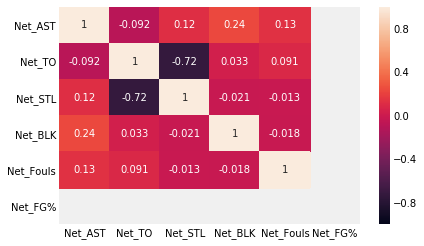

In [71]:
#It looks like Net_TO and Net_STL are strongly correlated with each other
#This makes sense since steals are literally turnovers.
#I am going to drop Net_STL from my dataset

ax = sns.heatmap(coll_1.corr(), vmin = -1, vmax = 1, annot=True)

In [72]:
#Here is another subset from the box_score dataset

coll_2 = box_score2.iloc[:, 6:11]

In [73]:
coll_2

,Net_3P%,Net_FTA,Net_TRB,Net_OR,Net_DR
0,0,-2,-15,-11,11
1,0,-2,-15,-11,11
2,0,-2,-15,-11,11
3,0,2,15,11,-11
4,0,2,15,11,-11
5,0,2,15,11,-11
6,0,-4,5,-13,13
7,0,-4,5,-13,13
8,0,-4,5,-13,13
9,0,4,-5,13,-13


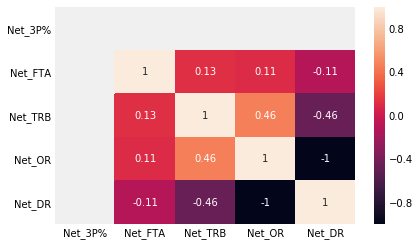

In [74]:
#It looks like Net_OR and Net_DR are perfectly correlated with each other
#I am sure there is a good reason for that and can be found in the glossary of terms
#I'm biased towards offense so I'm going to drop Net_DR from the dataset

ax = sns.heatmap(coll_2.corr(), vmin = -1, vmax = 1, annot=True)

In [75]:
box_score = box_score.drop(['Net_DR', 'Net_STL'], axis = 'columns')

In [76]:
box_score.head()

,Net_AST,Net_TO,Net_BLK,Net_Fouls,Net_FG%,Net_3P%,Net_FTA,Net_TRB,Net_OR,teamRslt_Win,teamLoc_Home
0,4,-8,5,-2,-0.1001,-0.1,-2,-15,-11.2435,0,0
1,4,-8,5,-2,-0.1001,-0.1,-2,-15,-11.2435,0,0
2,4,-8,5,-2,-0.1001,-0.1,-2,-15,-11.2435,0,0
3,-4,8,-5,2,0.1001,0.1,2,15,11.2435,1,1
4,-4,8,-5,2,0.1001,0.1,2,15,11.2435,1,1


In [77]:
#There are officially 44,284 rows and 11 columns worth of data

box_score.shape

(44284, 11)

# Checking for Statistical Significance

In [78]:
#In order to check the statistical significance, I am going to import the statsmodel library

import statsmodels.api as sm

In [79]:
#Separating X and y values

X = box_score.drop('teamRslt_Win', axis='columns')
y = box_score.loc[:, 'teamRslt_Win']

In [80]:
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

#This is specifically a column of 44284 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset
X = np.append(arr =  np.ones((44284,1)).astype(int), values = X, axis = 1)

In [81]:
#Checking if X came out correct
#We now have a Beta Constant and a Beta One to plug into our model

X

array([[  1.    ,   4.    ,  -8.    , ..., -15.    , -11.2435,   0.    ],
       [  1.    ,   4.    ,  -8.    , ..., -15.    , -11.2435,   0.    ],
       [  1.    ,   4.    ,  -8.    , ..., -15.    , -11.2435,   0.    ],
       ...,
       [  1.    ,  11.    ,  -3.    , ...,   8.    ,  14.1326,   1.    ],
       [  1.    ,  11.    ,  -3.    , ...,   8.    ,  14.1326,   1.    ],
       [  1.    ,  11.    ,  -3.    , ...,   8.    ,  14.1326,   1.    ]])

In [82]:
#The stats model has an OLS method that gives us a nice statistical summary of our model

regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [83]:
#Here we are checking the p-values of our various X variables
#I am setting the significance level at .05
#Looks like X1 and X10 are not statistically significant

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           teamRslt_Win   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     9218.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:44:07   Log-Likelihood:                -7217.0
No. Observations:               44284   AIC:                         1.446e+04
Df Residuals:                   44273   BIC:                         1.455e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5003      0.002    256.536      0.000       0.497       0.504
x1            -0.0004      0.000     -1.301      0.193      -0.001       0.000
x2            -0.0083      0.000    -18.686      0.000      -0.009      -0.007
x3             0.0032      0.000      7.714      0.000       0.002       0.004
x4            -0.0094      0.000    -23.180      0.000      -0.010      -0.009
x5             0.8750      0.038     23.207      0.000       0.801       0.949
x6             0.1966      0.013     15.597      0.000       0.172       0.221
x7             0.0026      0.000     10.978      0.000       0.002       0.003
x8             0.0028      0.000     11.335      0.000       0.002       0.003
x9             0.0214      0.000     76.326      0.000       0.021       0.022
x10           -0.0007      0.003     -0.240      0.810      -0.006       0.005
==============================================================================
Omnibus:                     4072.344   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.505
Skew:                           0.000   Prob(JB):                    6.30e-268
Kurtosis:                       2.183   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#We are going to create a separate set of X variables that are "high impact" based on our criteria
#First, we select a significance level needed to stay in the model. We will choose .05 to be simple
#Second, we fit the model with all possible predictors 
X_optimal = X[:,[0,2,3,4,5,6,7,8,9,10]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [85]:
#Here we are checking the p-values of our various X variables
#X9 is not statistically significant at the .05 criteria I established

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           teamRslt_Win   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:44:11   Log-Likelihood:                -7217.9
No. Observations:               44284   AIC:                         1.446e+04
Df Residuals:                   44274   BIC:                         1.454e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5005      0.002    257.433      0.000       0.497       0.504
x1            -0.0083      0.000    -18.712      0.000      -0.009      -0.007
x2             0.0032      0.000      7.667      0.000       0.002       0.004
x3            -0.0094      0.000    -23.144      0.000      -0.010      -0.009
x4             0.8703      0.038     23.190      0.000       0.797       0.944
x5             0.1960      0.013     15.557      0.000       0.171       0.221
x6             0.0027      0.000     11.766      0.000       0.002       0.003
x7             0.0028      0.000     11.431      0.000       0.002       0.003
x8             0.0213      0.000     78.313      0.000       0.021       0.022
x9            -0.0011      0.003     -0.385      0.700      -0.007       0.004
==============================================================================
Omnibus:                     4086.610   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.720
Skew:                          -0.000   Prob(JB):                    2.08e-268
Kurtosis:                       2.183   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#We are going to create a separate set of X variables that are "high impact" based on our criteria
#First, we select a significance level needed to stay in the model. We will choose .05 to be simple
#Second, we fit the model with all possible predictors 
X_optimal = X[:,[0,2,3,4,5,6,7,8,9]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [87]:
#Here we are checking the p-values of our various X variables
#All remaining variables are significant

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           teamRslt_Win   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:44:15   Log-Likelihood:                -7217.9
No. Observations:               44284   AIC:                         1.445e+04
Df Residuals:                   44275   BIC:                         1.453e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5000      0.001    369.403      0.000       0.497       0.503
x1            -0.0083      0.000    -18.714      0.000      -0.009      -0.007
x2             0.0032      0.000      7.661      0.000       0.002       0.004
x3            -0.0093      0.000    -23.188      0.000      -0.010      -0.009
x4             0.8700      0.038     23.187      0.000       0.796       0.944
x5             0.1960      0.013     15.555      0.000       0.171       0.221
x6             0.0027      0.000     11.771      0.000       0.002       0.003
x7             0.0028      0.000     11.430      0.000       0.002       0.003
x8             0.0213      0.000     78.325      0.000       0.021       0.022
==============================================================================
Omnibus:                     4086.682   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.731
Skew:                          -0.000   Prob(JB):                    2.07e-268
Kurtosis:                       2.183   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summary of Significance

The independent variables that had the most explanatory power for game outcomes were:
1. The constant (not relevant of course)
2. Net Turnovers
3. Net Blocks
4. Net Fouls
5. Net Field Goal Percentage
6. Net Three Point Percentage
7. Net Free Throw Attempts
8. Net Total Rebounds
9. Net Offensive Rating

# Final Thoughts

   I was surprised that home court advantage was not a statistically significant factor in explaining the outcome of games. I was also surprised that Net Days Off had a minimal impact on game outcomes. Everyone talks about resting players in the NBA, but it doesn't seem to be important when evaluating the team as a whole. It would be interesting to look a rest per player and evaluate their individual performance.
   
   Net offensive rating was the most significant variable in the model. The definition of offensive rating is it "Measures a team's points scored per 100 possessions." The formula for the metric is 100*((Points)/(POSS) and it is considered an advanced statistic. Now that I think about it, I am worried this is not an effective variable because if you measure it on a per game basis, this is simply another way of showing who scores the most points. Of course the team that scores the most points is going to win, that's literally the purpose of the game. 
    
   Besides offensive rating, none of the stats included are considered "advanced." Two projects that I will work on next are looking at data by team instead of as a whole and then creating a project that only evaluates advanced metrics.  